In [ ]:
# Lets start by detecting if we can detect text in the image using tessaract 

In [2]:
import pytesseract
import PIL
from PIL import Image


In [6]:
# testing image a1 for OCR 
img = Image.open('readonly/small_img/a-0.png')
img.show()

In [7]:
text = pytesseract.image_to_string(img) 
if "Christopher" in text:
    print("found")


found


In [8]:
# lets test all images in file for text "Christopher"

for i in range(4):
    filename = f'readonly/small_img/a-{i}.png'
    img = Image.open(filename)
    text = pytesseract.image_to_string(img)
    if "Christopher" in text:
        print("File :" , filename)
        print("found")
    


File : readonly/small_img/a-0.png
found
File : readonly/small_img/a-3.png
found


In [10]:
# above output shows OCR is wroking without kraken, no need to complicate the code. Its showing Christopher is in image a1 and a3. 
# lets search for mark in large file 
# mark should be in files 0,1,2,3,8,10,13 only 
for i in range(14):
    filename = f'readonly/images/a-{i}.png'
    img = Image.open(filename)
    print(f'processing file : a-{i}.png')
    text = pytesseract.image_to_string(img)
    if "Mark" in text:
        print("Mark found")
    else:
        print("Mark not in file")
    print("----------------------------------------------------")
    
 
    


processing file : a-0.png
Mark found
----------------------------------------------------
processing file : a-1.png
Mark found
----------------------------------------------------
processing file : a-2.png
Mark found
----------------------------------------------------
processing file : a-3.png
Mark found
----------------------------------------------------
processing file : a-4.png
Mark not in file
----------------------------------------------------
processing file : a-5.png
Mark not in file
----------------------------------------------------
processing file : a-6.png
Mark not in file
----------------------------------------------------
processing file : a-7.png
Mark not in file
----------------------------------------------------
processing file : a-8.png
Mark found
----------------------------------------------------
processing file : a-9.png
Mark not in file
----------------------------------------------------
processing file : a-10.png
Mark found
--------------------------------

In [21]:
# Output shows that mark found in required files only. So no need to use kraken , tessaract is working fine.  

# Now have to extract the face images from each image and make a dictionary 

from PIL import ImageDraw
from PIL import Image
import cv2 as cv

cv_img = cv.imread('readonly/small_img/a-0.png')
face_cascade = cv.CascadeClassifier(
    'readonly/haarcascade_frontalface_default.xml')



In [26]:
def show_rects(faces):
    #Lets read in our gif and convert it
    pil_img = Image.open('readonly/small_img/a-0.png')
    # Set our drawing context
    drawing = ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    for x, y, w, h in faces:
        drawing.rectangle((x, y, x+w, y+h), outline="yellow",width=2)
    #Finally lets display this
    display(pil_img)



In [ ]:
cv_img_bin=cv.threshold(cv_img,120,255,cv.THRESH_BINARY)[1]
faces = face_cascade.detectMultiScale(cv_img_bin)
# Now lets see the results



In [ ]:
show_rects(faces)


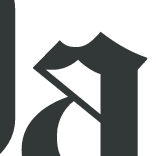

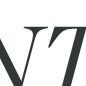

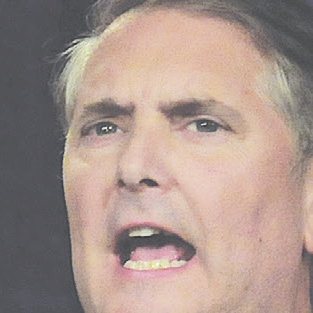

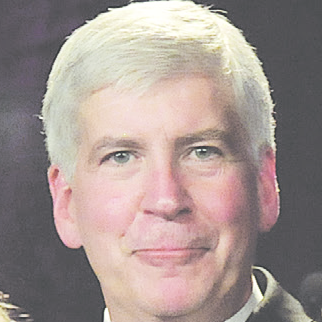

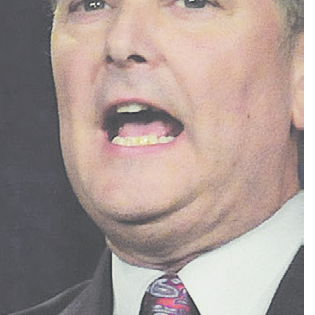

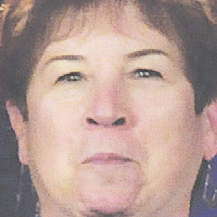

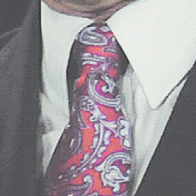

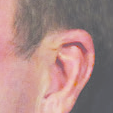

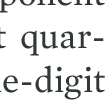

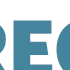

In [28]:
# First create a subroutine which takes in coordinates of faces and filename and generates a contact sheet of faces instead of 
# drawing boxes on the image 

def crop_faces(faces):
    #Lets read in our gif and convert it
    pil_img = Image.open('readonly/small_img/a-0.png')
    # Set our drawing context
    drawing = ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    for x, y, w, h in faces:
        display(pil_img.crop((x, y, x+w, y+h)))
    #Finally lets display this
    
crop_faces(faces)
